## Telescope observation based on weather

We know the probability of a cloudy day given a sunny day before and vice versa. Lets buils a Markov chain of the weather!


$$p({\rm clear \; tomorrow} \, |\,  {\rm cloudy \; today}) = 0.5,$$

which means that

$$p({\rm cloudy \; tomorrow} \, |\, {\rm cloudy \; today}) = 0.5.$$

We also have

$$p({\rm cloudy \; tomorrow} \, |\, {\rm clear \; today}) = 0.1,$$

which means that

$$p({\rm clear \; tomorrow} \, |\, {\rm clear \; today}) = 0.9.$$

we consider sunny = 1, cloudy = 0.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
n_days = 10 ** 4
day_0 = 0

(0.0, 1.0)

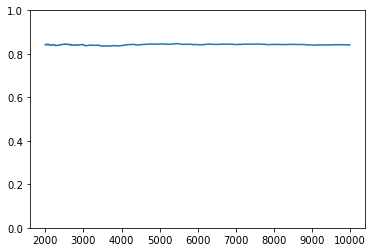

In [17]:
day_current = day_0
p_current = 1
weather = [day_current]

n_sunny = 0
if day_0 == 1: n_sunny = 1 #total number of sunny days, including the initial one

sunny_fraction = [n_sunny / 1]

#print('current day, prop. day, p current, p prop\n')
for i in range(1, n_days):
    day_prop = np.random.randint(0, 2)
    
    #determining probability of tomorrow's proposed weather based on today's
    if (weather[i - 1] == 0): #if today is cloudy
        weather.append(np.random.choice(np.array([0, 1]), p=np.array([0.5, 0.5])))     
    else: #if today is sunny
        weather.append(np.random.choice(np.array([0, 1]), p=np.array([0.1, 0.9])))

    if weather[i] == 1: n_sunny = n_sunny + 1
    sunny_fraction.append(n_sunny / (i + 1))
    
plt.plot(range(2000, n_days), sunny_fraction[2000:]) #we cut the first 2000 days as they're not stationary
plt.ylim([0, 1])

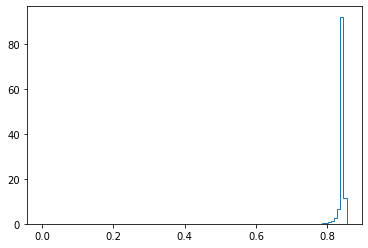

In [18]:
plt.hist(sunny_fraction, int(np.sqrt(n_days)), histtype = 'step', density = True)
plt.show()

In [19]:
#print('median = ', np.median(sunny_fraction[2000:]))
print('mean = ', np.mean(sunny_fraction))
print('error on the mean = ', np.std(sunny_fraction)/np.sqrt(n_days))

mean =  0.8390481863351391
error on the mean =  0.00024939950887778293
